Prediction of Surplus Food Production

Visualisation

In [ ]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/databse ml.csv')
df.head()

year       sector        food_type   tons_supply  tons_surplus  \
0  2019         Farm        Dry Goods  6.428605e+06  1.230837e+06   
1  2019         Farm          Produce  9.544273e+07  1.551747e+07   
2  2019  Foodservice  Breads & Bakery  3.110773e+04  5.708086e+02   
3  2019  Foodservice     Dairy & Eggs  1.479832e+04  2.715404e+02   
4  2019  Foodservice        Dry Goods  2.645191e+04  4.853770e+02   

     tons_waste  tons_uneaten  tons_anaerobically_digested  tons_composted  \
0  1.081247e+06  1.201759e+06                     0.000000        0.000000   
1  1.362843e+07  1.526485e+07                     0.000000        0.000000   
2  4.821472e+02  5.564499e+02                     0.144755       72.229657   
3  2.293631e+02  2.647098e+02                     0.068862       34.360502   
4  4.099854e+02  4.731673e+02                     0.123090       61.419216   

   tons_landfilled  meals_wasted  
0     24666.802930  2.002932e+09  
1    185655.329100  2.544142e+10  
2       432.694805  9.274164e+05  
3       205.838034  4.411830e+05  
4       367.934404  7.886122e+05

In [ ]:
df.shape

(2900, 11)

In [ ]:
df.describe()

year   tons_supply  tons_surplus    tons_waste  tons_uneaten  \
count  2900.000000  2.900000e+03  2.900000e+03  2.900000e+03  2.900000e+03   
mean   2014.500000  2.623189e+06  2.679148e+05  1.792719e+05  2.585290e+05   
std       2.872777  1.291010e+07  1.199884e+06  9.486624e+05  1.176127e+06   
min    2010.000000  0.000000e+00  2.614662e+00  2.208537e+00  2.548890e+00   
25%    2012.000000  3.092630e+04  1.704824e+03  1.434643e+03  1.662220e+03   
50%    2014.500000  1.195589e+05  4.583473e+03  3.753267e+03  4.465359e+03   
75%    2017.000000  3.156183e+05  1.860683e+04  1.449802e+04  1.794521e+04   
max    2019.000000  1.768595e+08  1.668478e+07  1.462788e+07  1.641735e+07   

       tons_anaerobically_digested  tons_composted  tons_landfilled  \
count                  2900.000000    2.900000e+03     2.900000e+03   
mean                   4874.012628    4.298887e+04     8.990233e+04   
std                   45246.779904    2.263968e+05     3.381836e+05   
min                       0.000000    0.000000e+00     1.982014e+00   
25%                       0.361037    2.038708e+02     1.262915e+03   
50%                       0.989026    5.621414e+02     3.384645e+03   
75%                       3.266968    2.213632e+03     1.297008e+04   
max                  816330.844400    3.041738e+06     3.017654e+06   

       meals_wasted  
count  2.900000e+03  
mean   4.308816e+08  
std    1.960212e+09  
min    4.248151e+03  
25%    2.770367e+06  
50%    7.442266e+06  
75%    2.990869e+07  
max    2.736226e+10

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         2900 non-null   int64  
 1   sector                       2900 non-null   object 
 2   food_type                    2900 non-null   object 
 3   tons_supply                  2900 non-null   float64
 4   tons_surplus                 2900 non-null   float64
 5   tons_waste                   2900 non-null   float64
 6   tons_uneaten                 2900 non-null   float64
 7   tons_anaerobically_digested  2900 non-null   float64
 8   tons_composted               2900 non-null   float64
 9   tons_landfilled              2900 non-null   float64
 10  meals_wasted                 2900 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 249.3+ KB


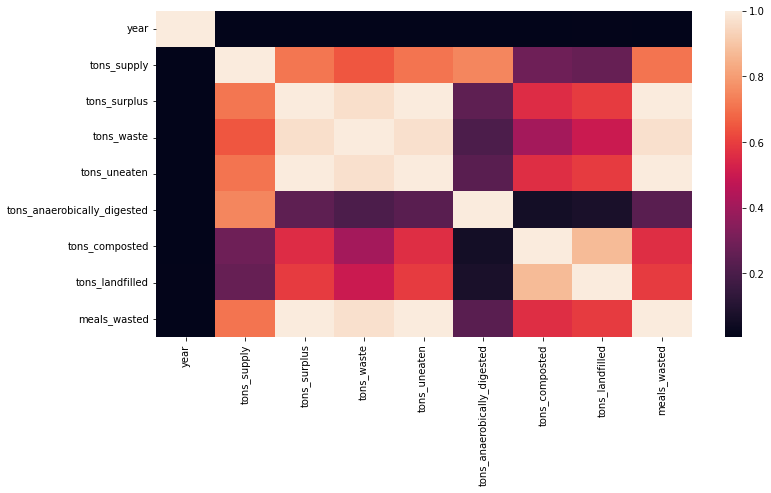

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

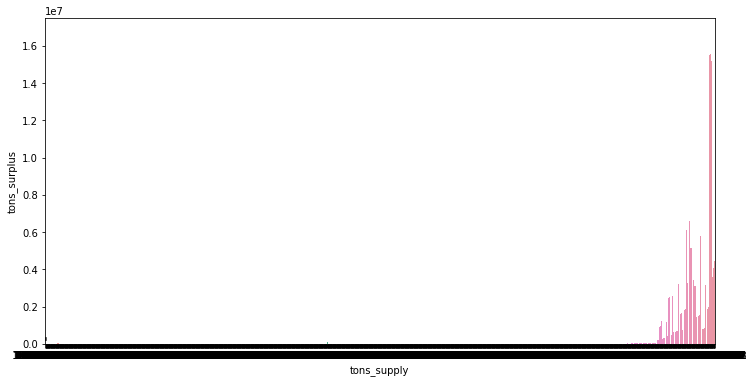

In [ ]:
# Plotting Relation between SUPPLY & SURPLUS
plt.figure(figsize = (12,6))
sns.barplot(x = 'tons_supply', y = 'tons_surplus', data=df)
plt.show()

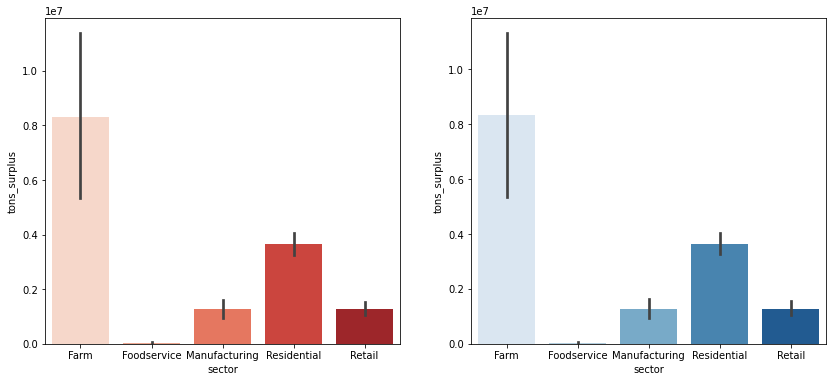

In [89]:
# Plotting Relation between SECTOR and SURPLUS
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'sector', y = 'tons_surplus', data=df, palette = 'Reds')
plt.subplot(1,2,2)
sns.barplot(x = 'sector', y = 'tons_surplus', data=df , palette = 'Blues')
plt.show()

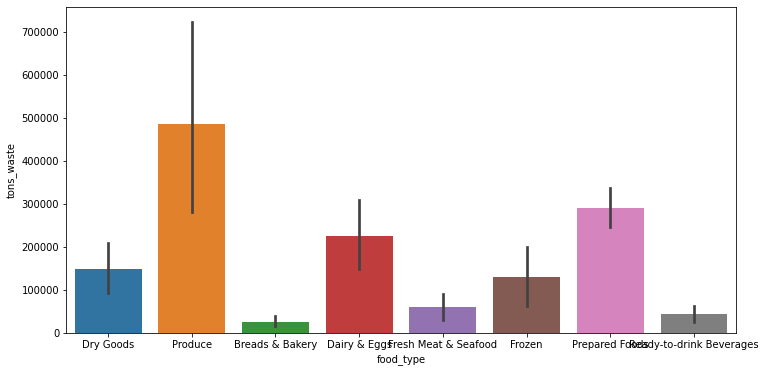

In [90]:
# Plotting Relation between FOOD TYPE & WASTE
plt.figure(figsize = (12,6))
sns.barplot(x = 'food_type', y = 'tons_waste',data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


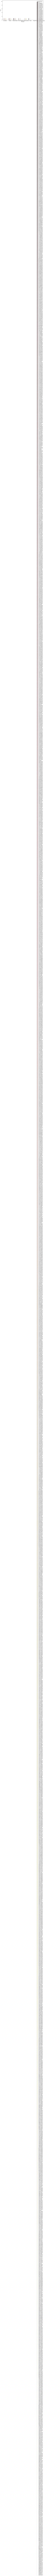

In [91]:
# Plotting Relation between FOOD TYPE & COMPOSTED FOOD
plt.figure(figsize = (12,6))
sns.countplot(df['food_type'] , hue = df['tons_composted'] , palette = 'pink')
plt.show()

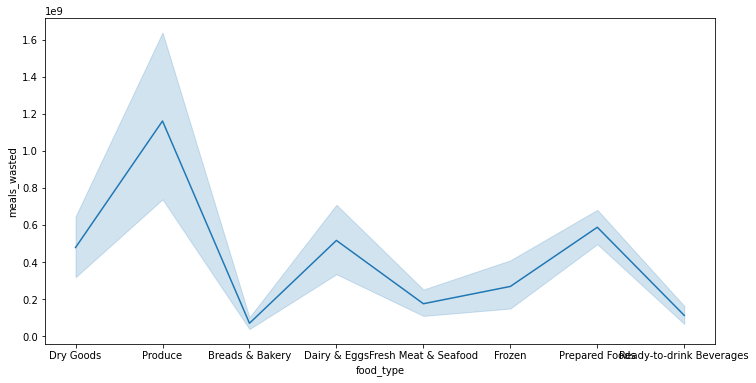

In [92]:
# Plotting Relation between FOOD TYPE & MEALS WASTED
plt.figure(figsize = (12,6))
sns.lineplot(x = 'food_type' , y = 'meals_wasted' , data = df)
plt.show()

In [93]:
x = df.drop(['tons_supply'] , axis = 1)
y = df['tons_supply']

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

Linear Regression and Lasso Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [ ]:
# loading the data from csv file to pandas dataframe
food_dataset = pd.read_csv('/content/databse ml.csv')

In [ ]:
food_dataset.head()

year       sector        food_type   tons_supply  tons_surplus  \
0  2019         Farm        Dry Goods  6.428605e+06  1.230837e+06   
1  2019         Farm          Produce  9.544273e+07  1.551747e+07   
2  2019  Foodservice  Breads & Bakery  3.110773e+04  5.708086e+02   
3  2019  Foodservice     Dairy & Eggs  1.479832e+04  2.715404e+02   
4  2019  Foodservice        Dry Goods  2.645191e+04  4.853770e+02   

     tons_waste  tons_uneaten  tons_anaerobically_digested  tons_composted  \
0  1.081247e+06  1.201759e+06                     0.000000        0.000000   
1  1.362843e+07  1.526485e+07                     0.000000        0.000000   
2  4.821472e+02  5.564499e+02                     0.144755       72.229657   
3  2.293631e+02  2.647098e+02                     0.068862       34.360502   
4  4.099854e+02  4.731673e+02                     0.123090       61.419216   

   tons_landfilled  meals_wasted  
0     24666.802930  2.002932e+09  
1    185655.329100  2.544142e+10  
2       432.694805  9.274164e+05  
3       205.838034  4.411830e+05  
4       367.934404  7.886122e+05

In [ ]:
# checking the number of rows and columns
food_dataset.shape

(2900, 11)

In [ ]:
# getting some information about the dataset
food_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         2900 non-null   int64  
 1   sector                       2900 non-null   object 
 2   food_type                    2900 non-null   object 
 3   tons_supply                  2900 non-null   float64
 4   tons_surplus                 2900 non-null   float64
 5   tons_waste                   2900 non-null   float64
 6   tons_uneaten                 2900 non-null   float64
 7   tons_anaerobically_digested  2900 non-null   float64
 8   tons_composted               2900 non-null   float64
 9   tons_landfilled              2900 non-null   float64
 10  meals_wasted                 2900 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 249.3+ KB


In [ ]:
# checking the number of missing values
food_dataset.isnull().sum()

year                           0
sector                         0
food_type                      0
tons_supply                    0
tons_surplus                   0
tons_waste                     0
tons_uneaten                   0
tons_anaerobically_digested    0
tons_composted                 0
tons_landfilled                0
meals_wasted                   0
dtype: int64

In [ ]:
 #checking the distribution of categorical data
print(food_dataset.sector.value_counts())
print(food_dataset.food_type.value_counts())

Foodservice      2640
Manufacturing      80
Residential        80
Retail             80
Farm               20
Name: sector, dtype: int64
Dry Goods                   390
Produce                     380
Dairy & Eggs                380
Prepared Foods              380
Breads & Bakery             370
Fresh Meat & Seafood        370
Ready-to-drink Beverages    370
Frozen                      260
Name: food_type, dtype: int64


Encoding the categorical data 

In [ ]:
# encoding "sector" Column
food_dataset.replace({'sector':{'Foodservice':0,'Manufacturing':1,'Residential':2,'Retail':3,'Farm':3}},inplace=True)



In [ ]:
# encoding "food_type" Column
food_dataset.replace({'food_type':{'Dry Goods':0,'Produce':1,'Dairy & Eggs':2,'Prepared Foods':3,'Breads & Bakery':3,'Fresh Meat & Seafood':4,'Ready-to-drink Beverages':5,'Frozen':6}},inplace=True)


In [ ]:
food_dataset.head()

year  sector  food_type   tons_supply  tons_surplus    tons_waste  \
0  2019       3          0  6.428605e+06  1.230837e+06  1.081247e+06   
1  2019       3          1  9.544273e+07  1.551747e+07  1.362843e+07   
2  2019       0          3  3.110773e+04  5.708086e+02  4.821472e+02   
3  2019       0          2  1.479832e+04  2.715404e+02  2.293631e+02   
4  2019       0          0  2.645191e+04  4.853770e+02  4.099854e+02   

   tons_uneaten  tons_anaerobically_digested  tons_composted  tons_landfilled  \
0  1.201759e+06                     0.000000        0.000000     24666.802930   
1  1.526485e+07                     0.000000        0.000000    185655.329100   
2  5.564499e+02                     0.144755       72.229657       432.694805   
3  2.647098e+02                     0.068862       34.360502       205.838034   
4  4.731673e+02                     0.123090       61.419216       367.934404   

   meals_wasted  
0  2.002932e+09  
1  2.544142e+10  
2  9.274164e+05  
3  4.411830e+05  
4  7.886122e+05

Splitting the data and target

In [ ]:
X = food_dataset.drop(['tons_supply','tons_surplus'],axis=1)
Y = food_dataset['tons_surplus']

In [ ]:
print(X)

      year  sector  food_type    tons_waste  tons_uneaten  \
0     2019       3          0  1.081247e+06  1.201759e+06   
1     2019       3          1  1.362843e+07  1.526485e+07   
2     2019       0          3  4.821472e+02  5.564499e+02   
3     2019       0          2  2.293631e+02  2.647098e+02   
4     2019       0          0  4.099854e+02  4.731673e+02   
...    ...     ...        ...           ...           ...   
2895  2010       3          4  1.518201e+05  3.577484e+05   
2896  2010       3          6  2.144287e+05  4.955690e+05   
2897  2010       3          3  6.265419e+04  1.448010e+05   
2898  2010       3          1  1.084874e+06  2.507268e+06   
2899  2010       3          5  3.028817e+05  4.997456e+05   

      tons_anaerobically_digested  tons_composted  tons_landfilled  \
0                        0.000000        0.000000     24666.802930   
1                        0.000000        0.000000    185655.329100   
2                        0.144755       72.229657       4

In [ ]:
print(Y)

0       1.230837e+06
1       1.551747e+07
2       5.708086e+02
3       2.715404e+02
4       4.853770e+02
            ...     
2895    4.434897e+05
2896    6.126259e+05
2897    1.790040e+05
2898    3.099502e+06
2899    6.650892e+05
Name: tons_surplus, Length: 2900, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9986560245506682


Visualising actual and predicted value

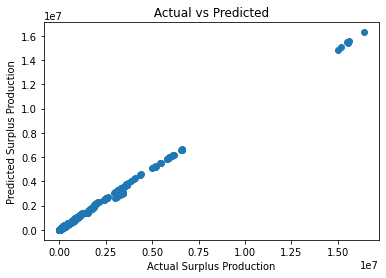

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Surplus Production")
plt.ylabel("Predicted Surplus Production")
plt.title(" Actual vs Predicted ")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9996881115624042


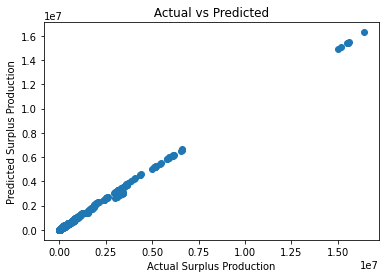

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Surplus Production")
plt.ylabel("Predicted Surplus Production")
plt.title(" Actual vs Predicted ")
plt.show()

2. Lasso Regression

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9986508137464466


Visualising actual and predicted value

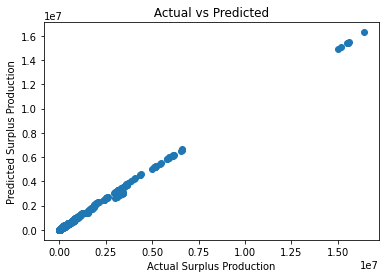

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Surplus Production")
plt.ylabel("Predicted Surplus Production")
plt.title(" Actual vs Predicted ")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9996711978585683


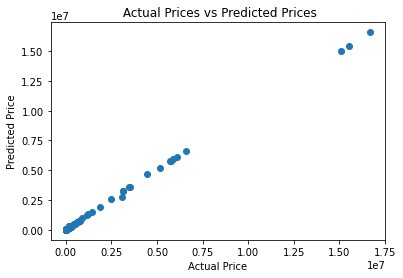

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Surplus Production")
plt.ylabel("Predicted Surplus Production ")
plt.title(" Actual vs Predicted")
plt.show()